In [1]:
# import pandas as pd
import pandas as pd
# check current directory with magic command for windows terminal, on mac probably use ls
!dir

 Volume in drive H is VUSE
 Volume Serial Number is 009A-9A03

 Directory of H:\DataScience\DataScience_essentials\vanderbilt-aspire-data-essentials

10/03/2018  07:09 AM    <DIR>          .
10/02/2018  08:47 AM    <DIR>          ..
10/03/2018  07:09 AM    <DIR>          .ipynb_checkpoints
10/03/2018  07:06 AM    <DIR>          Lessons
09/14/2018  11:49 AM               986 README.md
09/14/2018  11:49 AM            35,821 LICENSE
09/14/2018  11:49 AM             1,307 .gitignore
09/14/2018  11:49 AM    <DIR>          data
10/02/2018  01:38 PM    <DIR>          .git
09/26/2018  12:30 PM           277,212 DataScience_essentials_week1_to_3_vj.ipynb
               4 File(s)        315,326 bytes
               6 Dir(s)  2,173,394,567,168 bytes free


In [3]:
# create a DataFrame, hospice_df from hospice CSV
# file path ..\ previous folder
# hospice_df = pd.read_csv('..\data\Hospice_General_Information.csv')
hospice_df = pd.read_csv('.\data\Hospice_General_Information.csv')

In [4]:
# keep only the rows where facilities are in TN
hospice_TN = hospice_df.loc[hospice_df.State == 'TN']
hospice_TN.head(1)

,CMS Certification Number (CCN),Facility Name,Address Line 1,Address Line 2,City,State,Zip Code,County Name,PhoneNumber,CMS Region,Ownership Type,Certification Date
2889,441501,ALIVE HOSPICE INC,1718 PATTERSON ROAD,NaN,NASHVILLE,TN,37203,Davidson,(615) 327-1085,4,Non-Profit,04/10/1984


In [5]:
# examine the column names: used it to copy and modify the list to delete
hospice_TN.columns

Index(['CMS Certification Number (CCN)', 'Facility Name', 'Address Line 1',
       'Address Line 2', 'City', 'State', 'Zip Code', 'County Name',
       'PhoneNumber', 'CMS Region', 'Ownership Type', 'Certification Date'],
      dtype='object')

In [6]:
# learn usage of drop method on DataFrame : ['Facility Name', 'Address Line 1', 'City', 'State', 'County Name',
#       'CMS Region', 'Ownership Type', 'Certification Date']
?hospice_TN.drop

In [7]:
# keep only the desired columns: notice the dtype is object a default object type
#       -  Keep only the **Facility Name**, **Address Line 1**, **City**, **State**,
#**County Name**, **CMS Region**, **Ownership Type**, and **Cerfification Date** columns.
# drop with keyword axis 
hospice_TN_trunc = hospice_TN.drop(['CMS Certification Number (CCN)', 'Address Line 2', 'Zip Code', 
       'PhoneNumber'], axis =1)


In [8]:
# Make all column names lower case and without spaces.
# note only removes 1 space; need to use \s+ regex fro better compatibility 
hospice_TN_trunc.columns = hospice_TN_trunc.columns.str.lower().str.replace(' ','')
hospice_TN_trunc.columns

Index(['facilityname', 'addressline1', 'city', 'state', 'countyname',
       'cmsregion', 'ownershiptype', 'certificationdate'],
      dtype='object')

In [9]:
# - Examine the first 5 rows and the last five rows of the TN hospice data.
# note: default for head and tail is 5 rows
hospice_TN_trunc.head(5)

,facilityname,addressline1,city,state,countyname,cmsregion,ownershiptype,certificationdate
2889,ALIVE HOSPICE INC,1718 PATTERSON ROAD,NASHVILLE,TN,Davidson,4,Non-Profit,04/10/1984
2890,METHODIST ALLIANCE HOSPICE,"6400 SHELBY VIEW DRIVE, SUITE 101",MEMPHIS,TN,Shelby,4,Non-Profit,08/31/1984
2891,HOSPICE OF CHATTANOOGA INC,4411 OAKWOOD DRIVE,CHATTANOOGA,TN,Hamilton,4,Non-Profit,06/30/1986
2892,AMEDISYS HOSPICE CARE,6570 STAGE ROAD SUITE 110,BARTLETT,TN,Shelby,4,For-Profit,02/09/1987
2893,NORTHCREST HOME HEALTH AND HOSPICE,212 NORTHCREST DRIVE,SPRINGFIELD,TN,Robertson,4,Other,07/13/1987


In [10]:
# the last five rows
hospice_TN_trunc.tail(5)

,facilityname,addressline1,city,state,countyname,cmsregion,ownershiptype,certificationdate
2940,ENCOMPASS HOSPICE OF TENNESSEE,828 ROYAL PARKWAY SUITE 113,NASHVILLE,TN,Davidson,4,For-Profit,06/16/2010
2941,QUALITY HOSPICE,341 WEST CENTRAL AVENUE,JAMESTOWN,TN,Fentress,4,For-Profit,01/04/2013
2942,HEARTH HOSPICE,1800A ROSSVILLE AVE SUITE 114,CHATTANOOGA,TN,Hamilton,4,For-Profit,03/22/2013
2943,"AMEDISYS HOSPICE, AN ADVENTA COMPANY",400 ROYAL PARKWAY,NASHVILLE,TN,Davidson,4,Other,01/05/2016
2944,KINDRED HOSPICE,"430 STUART RD NE, STE 2",CLEVELAND,TN,Bradley,4,For-Profit,01/04/2017


In [11]:
# - Print the dimensions of the data. How many hospice facilities are in TN?
# ?hospice_TN_trunc.size # not useful gives row*column for DataFrame
# hospice_TN.ndim # 2 check dimensions
#hospice_TN_trunc.state.count()
#hospice_TN.State.count()
print('The dimension of the data(hospice_TN) is  ' + str(hospice_TN_trunc.shape))
print('# of hospice facilities in TN: ' + str(hospice_TN_trunc.shape[0]))

The dimension of the data(hospice_TN) is  (56, 8)
# of hospice facilities in TN: 56


In [13]:
#  * Create a DataFrame, `cancer_df`, from the cancer CSV file.  
#      - Look at the head and tail of the DataFrame.  
#     - Print the shape of the cancer data.  
#     - Keep and rename all columns. 
#     - You can read more about **2020 Healthy People Objective target of 161.4 cancer deaths per 100,000 people** [here](https://www.healthypeople.gov/).
!dir .\data\*.csv


 Volume in drive H is VUSE
 Volume Serial Number is 009A-9A03

 Directory of H:\DataScience\DataScience_essentials\vanderbilt-aspire-data-essentials\data

09/14/2018  11:49 AM           551,971 PEP_2017_PEPAGESEX.csv
09/14/2018  11:49 AM           605,007 Hospice_General_Information.csv
09/14/2018  11:49 AM             9,045 cancer_deaths.csv
               3 File(s)      1,166,023 bytes
               0 Dir(s)  2,173,394,781,184 bytes free


In [14]:
# create a DataFrame, cancer_df from cancer CSV
# using r before path name creats raw string avoiding \n, \t, etc to be interpreted as escape characters
# keywords: skiprows, nrows, skipfooter, engine

cancer_df = pd.read_csv(r'.\data\cancer_deaths.csv', skiprows=4, nrows = 98)
# could use  skipfooter=1, engine = 'python' # note some complications using skipfooter in conjuction with nrows 
# and engine conflict when using skipfooter 
#?pd.read_csv
type(cancer_df)
# cancer_df read correctly?
cancer_df
# of 111 rows and 11 columns in dataframe only 0-97 rows is actual data rest is foot notes. 0 th row is headings

,County,FIPS,Met Healthy People Objective of 161.4?,"Age-Adjusted Death Rate - deaths per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend in Death Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,Tennessee,47999.0,No,185.4,184.0,186.8,13933.0,falling,-1.4,-1.5,-1.2
1,United States,0.0,No,163.5,163.3,163.7,586354.0,falling,-1.5,-1.6,-1.5
2,Trousdale County,47169.0,No,265.5,219.0,319.1,24.0,stable,0.0,-1.3,1.3
3,Scott County,47151.0,No,241.0,214.5,270.0,63.0,stable,-0.5,-1.1,0.1
4,Cheatham County,47021.0,No,239.6,217.8,263.0,97.0,stable,-0.6,-1.4,0.3
5,Claiborne County,47025.0,No,237.3,216.4,259.8,100.0,stable,-0.1,-0.7,0.4
6,Hancock County,47067.0,No,236.2,193.1,287.1,22.0,stable,0.4,-0.8,1.6
7,Union County,47173.0,No,234.2,206.1,265.3,53.0,stable,-0.5,-1.2,0.2
8,Benton County,47005.0,No,233.9,207.1,263.6,59.0,stable,0.3,-0.4,1.1
9,Houston County,47083.0,No,227.4,188.9,272.1,26.0,stable,0.4,-0.6,1.3


In [16]:
# read columns
cancer_column_df = pd.read_csv(r'.\data\cancer_deaths.csv', skiprows=3, nrows = 1)
#Q index_col = 0 sets 0th column as label, did not find keyworkd for row labels: ask?
cancer_column_df

,Sorted by Rate,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,County,FIPS,Met Healthy People Objective of 161.4?,"Age-Adjusted Death Rate - deaths per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend in Death Rates,Lower 95% Confidence Interval,Upper 95% Confidence Interval


In [17]:
##      - Look at the head and tail of the DataFrame.
print(cancer_df.head())
print(cancer_df.tail())
#     - Print the shape of the cancer data. 
print('shape of cancerDataFrame: ' + str(cancer_df.shape))
# cancer_df.shape() : error tuple object not callable ; cancer_df.shape OK: shape a method not function?

             County     FIPS Met Healthy People Objective of 161.4?  \
0         Tennessee  47999.0                                     No   
1     United States      0.0                                     No   
2  Trousdale County  47169.0                                     No   
3      Scott County  47151.0                                     No   
4   Cheatham County  47021.0                                     No   

   Age-Adjusted Death Rate - deaths per 100,000  \
0                                         185.4   
1                                         163.5   
2                                         265.5   
3                                         241.0   
4                                         239.6   

   Lower 95% Confidence Interval  Upper 95% Confidence Interval  \
0                          184.0                          186.8   
1                          163.3                          163.7   
2                          219.0                          319.1  

In [18]:
#  Keep and rename all columns.
print(cancer_df.columns)
# output of following command is better than print
cancer_df.head(1)
cancer_df.columns = ['county', 'FIPS', 'Healthy People(>161.4)', 'age adjusted death rate(DR)', 'LCI 95%', 'UCI 95%',
                     'Avg annual count', 'recent trend', 'recent 5yr trend in DR', 'LCI 95%','UCI 95%']
cancer_df.columns

Index(['County', ' FIPS', 'Met Healthy People Objective of 161.4?',
       'Age-Adjusted Death Rate - deaths per 100,000',
       'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval',
       'Average Annual Count', 'Recent Trend',
       'Recent 5-Year Trend in Death Rates', 'Lower 95% Confidence Interval.1',
       'Upper 95% Confidence Interval.1'],
      dtype='object')


Index(['county', 'FIPS', 'Healthy People(>161.4)',
       'age adjusted death rate(DR)', 'LCI 95%', 'UCI 95%', 'Avg annual count',
       'recent trend', 'recent 5yr trend in DR', 'LCI 95%', 'UCI 95%'],
      dtype='object')

In [19]:
# need to figure out how to open csv in text editor
# nano('..\data\cancer_deaths.csv')
# work on indexing the dataframe

In [20]:
#Create a DataFrame, `pop_df`, from the census CSV file.  
#      -  Look at the head and the tail
#- Print the shape 
pop_df = pd.read_csv(r'.\data\PEP_2017_PEPAGESEX.csv', skiprows = 1)
pop_df.head()

,Id,Id2,Geography,"April 1, 2010 - Census - Both Sexes; Total","April 1, 2010 - Census - Male; Total","April 1, 2010 - Census - Female; Total","April 1, 2010 - Estimates Base - Both Sexes; Total","April 1, 2010 - Estimates Base - Male; Total","April 1, 2010 - Estimates Base - Female; Total",Population Estimate (as of July 1) - 2010 - Both Sexes; Total,...,Population Estimate (as of July 1) - 2014 - Females; Median age (years),Population Estimate (as of July 1) - 2015 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2015 - Male; Median age (years),Population Estimate (as of July 1) - 2015 - Female; Median age (years),Population Estimate (as of July 1) - 2016 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2016 - Male; Median age (years),Population Estimate (as of July 1) - 2016 - Female; Median age (years),Population Estimate (as of July 1) - 2017 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2017 - Male; Median age (years),Population Estimate (as of July 1) - 2017 - Female; Median age (years)
0,0500000US47001,47001,"Anderson County, Tennessee",75129,36308,38821,75094,36288,38806,75112,...,44.8,43.3,41.4,44.8,43.3,41.5,45.1,43.2,41.2,45.0
1,0500000US47003,47003,"Bedford County, Tennessee",45058,22357,22701,45056,22356,22700,45086,...,38.4,37.2,35.9,38.5,37.5,36.2,38.8,37.5,36.2,38.9
2,0500000US47005,47005,"Benton County, Tennessee",16489,8073,8416,16491,8074,8417,16511,...,48.3,46.6,45.2,48.0,47.1,45.7,48.4,47.4,46.0,48.7
3,0500000US47007,47007,"Bledsoe County, Tennessee",12876,6964,5912,12872,6962,5910,12882,...,46.3,43.4,41.7,46.5,43.5,41.9,46.4,43.9,42.1,47.3
4,0500000US47009,47009,"Blount County, Tennessee",123010,59559,63451,123100,59596,63504,123213,...,44.1,43.4,42.1,44.5,43.7,42.2,44.9,43.8,42.3,45.1


In [21]:
pop_df.tail()

,Id,Id2,Geography,"April 1, 2010 - Census - Both Sexes; Total","April 1, 2010 - Census - Male; Total","April 1, 2010 - Census - Female; Total","April 1, 2010 - Estimates Base - Both Sexes; Total","April 1, 2010 - Estimates Base - Male; Total","April 1, 2010 - Estimates Base - Female; Total",Population Estimate (as of July 1) - 2010 - Both Sexes; Total,...,Population Estimate (as of July 1) - 2014 - Females; Median age (years),Population Estimate (as of July 1) - 2015 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2015 - Male; Median age (years),Population Estimate (as of July 1) - 2015 - Female; Median age (years),Population Estimate (as of July 1) - 2016 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2016 - Male; Median age (years),Population Estimate (as of July 1) - 2016 - Female; Median age (years),Population Estimate (as of July 1) - 2017 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2017 - Male; Median age (years),Population Estimate (as of July 1) - 2017 - Female; Median age (years)
90,0500000US47181,47181,"Wayne County, Tennessee",17021,9402,7619,17027,9404,7623,16987,...,45.8,42.6,39.8,46.5,42.7,39.9,46.7,43.1,40.0,47.4
91,0500000US47183,47183,"Weakley County, Tennessee",35021,17159,17862,35015,17157,17858,35042,...,39.2,37.6,36.0,39.2,37.9,36.2,39.6,38.3,36.6,40.1
92,0500000US47185,47185,"White County, Tennessee",25841,12640,13201,25836,12637,13199,25821,...,44.0,42.7,41.0,44.2,42.8,41.2,44.3,42.8,41.3,44.4
93,0500000US47187,47187,"Williamson County, Tennessee",183182,89336,93846,183252,89371,93881,184130,...,39.7,39.0,38.2,39.7,39.0,38.3,39.7,39.0,38.3,39.7
94,0500000US47189,47189,"Wilson County, Tennessee",113993,55834,58159,114057,55863,58194,114677,...,41.1,40.2,39.2,41.1,40.0,39.0,40.9,39.9,39.0,40.8


In [22]:
# shape
print('the shape of population data frame: '+str(pop_df.shape))

the shape of population data frame: (95, 993)


In [23]:
# index, column, values
# index = row_labels = row_names; column labels =  column names
# values = data 
# axis = dimension, Axes; axis[0] = row; axis[1] = columns
# referencing by position or name
# indexing = subset selection 
# indexing by [], .loc[], .iloc[]
# ?pd.read_csv
col_label = pop_df.columns.str
col_label
#col_label = pop_df.columns.str
#col_label


##### Week 3:
Cleaning Data  
- Approaches and techniques for cleaning data
- Common data wrangling & cleaning issues  
- Hands-on lab to clean, organize data
- Coding Tasks:
    * Work on cleaning and wrangling `pop_df`. 
        - cancer rates begin to climb at age 50 so we are particularly interested in population over 50.
        - In the end, you should have these 31 columns:  
   `'county', 'pop2010all', 'pop2014all', 'pop2017all', 'median_age_2010', 'median_age_2014', 'median_age_2017', 'pop2010_50to54','pop2014_50to54', 'pop2017_50to54', 'pop2010_55to59', 'pop2014_55to59', 'pop2017_55to59', 'pop2010_60to64', 'pop2014_60to64', 'pop2017_60to64',
    'pop2010_65to69', 'pop2014_65to69', 'pop2017_65to69', 'pop2010_70to74', 'pop2014_70to74', 'pop2017_70to74', 'pop2010_75to79', 'pop2014_75to79', 'pop2017_75to79', 'pop2010_80to84', 'pop2014_80to84', 'pop2017_80to84',
    'pop2010_85over', 'pop2014_85over', 'pop2017_85over'.  
            - beginning DataFrame has 95 rows and 993 columns
            - drop all April estimate columns
            - keep only columns that pertain to 2010, 2014, and 2017
    
    * Use an outer join to merge `pop_df` and `cancer` data to a DataFrame called `pop_and_cancer`
    * Use the pandas series `value_counts()` method to create a dictionary called `hospice_per_county`. The key for this dict will be the county name and the value will be the count of hospice facilities in that county. Populate the dictionary for all TN counties by adding the counties with 0 hospice facilities to `hospice_per_county`.
    * Use the dictionary you created, `hospice_per_county` to populate a new column in `pop_and_cancer`. Call this column `hospice_count`.

In [25]:
# strategy 2
pop_df = pd.read_csv(r'.\data\PEP_2017_PEPAGESEX.csv', skiprows = 1)
# replace name of columns to desired name
# df.rename(index=str, columns={"A": "a", "C": "c"})

# (1)rename columns
pop_df.rename(index=str, inplace='True', columns={
    'Geography': 'county',
    'Population Estimate (as of July 1) - 2010 - Both Sexes; Total': 'pop2010all',
    'Population Estimate (as of July 1) - 2014 - Both Sexes; Total': 'pop2014all',
    'Population Estimate (as of July 1) - 2017 - Both Sexes; Total': 'pop2017all',
    'Population Estimate (as of July 1) - 2010 - Both Sexes; Median age (years)':'median_age_2010',
    'Population Estimate (as of July 1) - 2014 - Both Sexes; Median age (years)':'median_age_2014',
    'Population Estimate (as of July 1) - 2017 - Both Sexes; Median age (years)':'median_age_2017',
    'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 50 to 54 years':'pop2010_50to54',
    'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 50 to 54 years':'pop2014_50to54',
    'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 50 to 54 years':'pop2017_50to54',
    'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 55 to 59 years':'pop2010_55to59',
    'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 55 to 59 years':'pop2014_55to59',
    'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 55 to 59 years':'pop2017_55to59',
    'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 60 to 64 years':'pop2010_60to64',
    'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 60 to 64 years':'pop2014_60to64',
    'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 60 to 64 years':'pop2017_60to64',
    'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 65 to 69 years':'pop2010_65to69',
    'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 65 to 69 years':'pop2014_65to69',
    'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 65 to 69 years':'pop2017_65to69',
    'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 70 to 74 years':'pop2010_70to74', 
    'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 70 to 74 years':'pop2014_70to74',
    'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 70 to 74 years':'pop2017_70to74',
    'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 75 to 79 years':'pop2010_75to79', 
    'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 75 to 79 years':'pop2014_75to79',
    'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 75 to 79 years':'pop2017_75to79',
    'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 80 to 84 years':'pop2010_80to84', 
    'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 80 to 84 years':'pop2014_80to84',
    'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 80 to 84 years':'pop2017_80to84',
    'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 85 years and over':'pop2010_85over', 
    'Population Estimate (as of July 1) - 2014 - Both Sexes; Total - 85 years and over':'pop2014_85over',
    'Population Estimate (as of July 1) - 2017 - Both Sexes; Total - 85 years and over':'pop2017_85over'
})
pop_df.head(1)


,Id,Id2,county,"April 1, 2010 - Census - Both Sexes; Total","April 1, 2010 - Census - Male; Total","April 1, 2010 - Census - Female; Total","April 1, 2010 - Estimates Base - Both Sexes; Total","April 1, 2010 - Estimates Base - Male; Total","April 1, 2010 - Estimates Base - Female; Total",pop2010all,...,Population Estimate (as of July 1) - 2014 - Females; Median age (years),Population Estimate (as of July 1) - 2015 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2015 - Male; Median age (years),Population Estimate (as of July 1) - 2015 - Female; Median age (years),Population Estimate (as of July 1) - 2016 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2016 - Male; Median age (years),Population Estimate (as of July 1) - 2016 - Female; Median age (years),median_age_2017,Population Estimate (as of July 1) - 2017 - Male; Median age (years),Population Estimate (as of July 1) - 2017 - Female; Median age (years)
0,0500000US47001,47001,"Anderson County, Tennessee",75129,36308,38821,75094,36288,38806,75112,...,44.8,43.3,41.4,44.8,43.3,41.5,45.1,43.2,41.2,45.0


In [26]:
# (2) drop columns
for i in pop_df.columns:
    if(i not in ['county', 'pop2010all', 'pop2014all', 'pop2017all', 'median_age_2010', 'median_age_2014', 'median_age_2017', 'pop2010_50to54','pop2014_50to54', 'pop2017_50to54', 'pop2010_55to59', 'pop2014_55to59', 'pop2017_55to59', 'pop2010_60to64', 'pop2014_60to64', 'pop2017_60to64',
    'pop2010_65to69', 'pop2014_65to69', 'pop2017_65to69', 'pop2010_70to74', 'pop2014_70to74', 'pop2017_70to74', 'pop2010_75to79', 'pop2014_75to79', 'pop2017_75to79', 'pop2010_80to84', 'pop2014_80to84', 'pop2017_80to84',
    'pop2010_85over', 'pop2014_85over', 'pop2017_85over']):
        pop_df.drop(inplace=True,columns = i )


pop_df.shape

(95, 31)

In [27]:
# use pd.merge() to join pop_df and cancer
# load cancer data frame
# create a DataFrame, cancer_df from cancer CSV
# using r before path name creats raw string avoiding \n, \t, etc to be interpreted as escape characters
# keywords: skiprows, nrows, skipfooter, engine

cancer_df = pd.read_csv(r'.\data\cancer_deaths.csv', skiprows=4, nrows = 98)
cancer_df.shape
cancer_df.head(3)

,County,FIPS,Met Healthy People Objective of 161.4?,"Age-Adjusted Death Rate - deaths per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend in Death Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,Tennessee,47999.0,No,185.4,184.0,186.8,13933.0,falling,-1.4,-1.5,-1.2
1,United States,0.0,No,163.5,163.3,163.7,586354.0,falling,-1.5,-1.6,-1.5
2,Trousdale County,47169.0,No,265.5,219.0,319.1,24.0,stable,0.0,-1.3,1.3


In [28]:
# examine the format of county
cancer_df.County = cancer_df.County.str.replace(' County','')
cancer_df.County.head()

0        Tennessee
1    United States
2        Trousdale
3            Scott
4         Cheatham
Name: County, dtype: object

In [29]:
pop_df.county.head()

0    Anderson County, Tennessee
1     Bedford County, Tennessee
2      Benton County, Tennessee
3     Bledsoe County, Tennessee
4      Blount County, Tennessee
Name: county, dtype: object

In [30]:
# replace the non matching part in county
pop_df.county = pop_df.county.str.replace(' County, Tennessee','')

# rename the columns ot match the two data frames
pop_df.columns = pop_df.columns.str.capitalize()
pop_df.head()

,County,Pop2010all,Pop2014all,Pop2017all,Pop2010_50to54,Pop2014_50to54,Pop2017_50to54,Pop2010_55to59,Pop2014_55to59,Pop2017_55to59,...,Pop2017_75to79,Pop2010_80to84,Pop2014_80to84,Pop2017_80to84,Pop2010_85over,Pop2014_85over,Pop2017_85over,Median_age_2010,Median_age_2014,Median_age_2017
0,Anderson,75112,75131,76257,5850,5690,5296,5577,5689,5643,...,2501,1969,1779,1785,2135,2211,2173,42.6,43.3,43.2
1,Bedford,45086,46259,48117,3043,3207,3239,2646,2938,3143,...,1321,756,729,811,647,679,640,36.5,37.2,37.5
2,Benton,16511,16176,15986,1259,1204,1179,1224,1239,1206,...,717,414,399,418,362,409,415,45.6,46.7,47.4
3,Bledsoe,12882,14419,14717,1005,1216,1185,903,1100,1197,...,510,234,275,267,178,209,264,42.5,43.3,43.9
4,Blount,123213,125827,129929,9152,9658,9522,8657,9094,9615,...,4663,2550,2591,2939,2390,2656,2786,41.5,43.1,43.8


In [31]:
# join the data frames
pd.merge?

In [32]:
# * Use an outer join to merge `pop_df` and `cancer` data to a DataFrame called `pop_and_cancer`
pop_and_cancer = pd.merge(pop_df, cancer_df, how = 'outer')
pop_and_cancer.County
pop_and_cancer.head()

,County,Pop2010all,Pop2014all,Pop2017all,Pop2010_50to54,Pop2014_50to54,Pop2017_50to54,Pop2010_55to59,Pop2014_55to59,Pop2017_55to59,...,FIPS,Met Healthy People Objective of 161.4?,"Age-Adjusted Death Rate - deaths per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend in Death Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,Anderson,75112.0,75131.0,76257.0,5850.0,5690.0,5296.0,5577.0,5689.0,5643.0,...,47001.0,No,180.6,169.1,192.7,195.0,falling,-0.7,-1.2,-0.2
1,Bedford,45086.0,46259.0,48117.0,3043.0,3207.0,3239.0,2646.0,2938.0,3143.0,...,47003.0,No,182.7,166.1,200.6,92.0,falling,-0.7,-1.4,-0.1
2,Benton,16511.0,16176.0,15986.0,1259.0,1204.0,1179.0,1224.0,1239.0,1206.0,...,47005.0,No,233.9,207.1,263.6,59.0,stable,0.3,-0.4,1.1
3,Bledsoe,12882.0,14419.0,14717.0,1005.0,1216.0,1185.0,903.0,1100.0,1197.0,...,47007.0,No,170.0,143.5,200.6,31.0,falling,-1.3,-2.3,-0.3
4,Blount,123213.0,125827.0,129929.0,9152.0,9658.0,9522.0,8657.0,9094.0,9615.0,...,47009.0,No,168.2,159.4,177.4,283.0,falling,-0.9,-1.3,-0.4


In [33]:
#* Use the pandas series `value_counts()` method to create a dictionary called `hospice_per_county`. 
#The key for this dict will be the county name and the value will be the count of hospice facilities in that county.#
#Populate the dictionary for all TN counties by adding the counties with 0 hospice facilities to `hospice_per_county`.
hospice_geo = hospice_df[['City','State','County Name']]
# in TN
hospice_geo_TN = hospice_geo[hospice_geo.State == 'TN']
# county dict
hospice_per_county = hospice_geo_TN['County Name'].value_counts().to_dict()
# add counties present in pop_and_cancer
for county in pop_and_cancer.County:
    if county in hospice_per_county:
        continue
    else: hospice_per_county[county] = 0
hospice_per_county
# hospice df has city, state, county
# tips:
# mydictionary = df.column.value_counts().to_dict()
#hospice_per_county = hospice_df.CountyName hospice_df.head()

{'Davidson': 8,
 'Knox': 5,
 'Shelby': 5,
 'Hamilton': 5,
 'Williamson': 2,
 'Carroll': 2,
 'Bradley': 2,
 'Robertson': 2,
 'Washington': 2,
 'Madison': 2,
 'Fentress': 1,
 'Putnam': 1,
 'Blount': 1,
 'Sumner': 1,
 'Coffee': 1,
 'Claiborne': 1,
 'Wayne': 1,
 'Sullivan': 1,
 'Hamblen': 1,
 'Henry': 1,
 'Fayette': 1,
 'Montgomery': 1,
 'Cumberland': 1,
 'Lincoln': 1,
 'Carter': 1,
 'McMinn': 1,
 'Rutherford': 1,
 'Perry': 1,
 'Obion': 1,
 'Cocke': 1,
 'Hancock': 1,
 'Anderson': 0,
 'Bedford': 0,
 'Benton': 0,
 'Bledsoe': 0,
 'Campbell': 0,
 'Cannon': 0,
 'Cheatham': 0,
 'Chester': 0,
 'Clay': 0,
 'Crockett': 0,
 'Decatur': 0,
 'DeKalb': 0,
 'Dickson': 0,
 'Dyer': 0,
 'Franklin': 0,
 'Gibson': 0,
 'Giles': 0,
 'Grainger': 0,
 'Greene': 0,
 'Grundy': 0,
 'Hardeman': 0,
 'Hardin': 0,
 'Hawkins': 0,
 'Haywood': 0,
 'Henderson': 0,
 'Hickman': 0,
 'Houston': 0,
 'Humphreys': 0,
 'Jackson': 0,
 'Jefferson': 0,
 'Johnson': 0,
 'Lake': 0,
 'Lauderdale': 0,
 'Lawrence': 0,
 'Lewis': 0,
 'Loudon':

In [ ]:
# pop_and_cancer[‘<new_col>’] = hospice_per_county[county] for for county in pop_and_cancer.county]
#* Use the dictionary you created, `hospice_per_county` to populate a new column in `pop_and_cancer`.
#Call this column `hospice_count`.
pop_and_cancer['hospice_per_county'] = [
    hospice_per_county[county] for county in pop_and_cancer.County]   
pop_and_cancer[['County', 'hospice_per_county']]

# Week 3 finish


In [ ]:
##### Week 4:
Exploratory Data Analysis
- Understanding variable types and assessing missingness
- Visualization as a tool for exploration
- Introduction to `matplotlib.pyplot` and `seaborn`
- Coding tasks:  
  * Find which columns have missing values? How many? What should you do about it? 
  * Find the average death rate from cancer for counties in TN?
  * What does the distribution of the `recent_5year_trend` of deaths from cancer look like for TN counties?
  * What does the distribution of counties **meeting** and **not meeting** the 2020 Healthy People Objective target of 161.4 cancer deaths per 100,000 people look like?
   * Find the 4 counties that have more than 2 hospice facilities? Any surprises?
    * Find the 5 counties with the highest death rate per 100K people.
  * Create 3 new features in `pop_and_cancer`:  `percent_pop_over_50_2010`, `percent_pop_over_50_2014`, `percent_pop_over_50_2017` by dividing each county's over 50 population for 2010, 2014, and 2017 by that year's total population. After you've verified that these columns were created correctly, drop the 24 columns (8 for each year) that you used to create the new buckets: 'pop2010_50to54',
  'pop2014_50to54', 'pop2017_50to54', 'pop2010_55to59', 'pop2014_55to59', 'pop2017_55to59', 'pop2010_60to64', 'pop2014_60to64', 'pop2017_60to64', 'pop2010_65to69', 'pop2014_65to69', 'pop2017_65to69', 'pop2010_70to74', 'pop2014_70to74', 'pop2017_70to74', 'pop2010_75to79', 'pop2014_75to79', 'pop2017_75to79', 'pop2010_80to84', 'pop2014_80to84', 'pop2017_80to84', 'pop2010_85over', 'pop2014_85over', 'pop2017_85over',
     - in 2017, for which two counties was the population over age 50 **greater than half** of the total population?
     - in 2017, for which five counties was the population over age 50 **less than a third** of the total population?

  * create a scatterplot to show the relationship between cancer deaths and the percentage of population over age 50 in TN counties. Use the 2017 population data. Be sure to label axes and add a title.
  * create another new feature, `normalized_hospice_rate` in `pop_and_cancer`. Divide the count of hospices by the 2017 total population and multiply the result by 100,000.
  * create a scatterplot to examine the relationship between population over 50 and the normalized hospice rate in TN counties.
  * Use seaborn to create a boxplot normalized hospice rates, with nested grouping by the Healthy People cancer goal categories.
  

In [36]:
# import seaborn and matplot lib
import matplotlib as plt
import seaborn as sns

In [42]:
# explore nulll values and ocurence
# do reasonable 
pop_and_cancer.isnull().sum()
# most of column have 3 null values, might occur in few rows
# pop_and_cancer.isnull().sum?
# all rows with missing values
pop_and_cancer[pop_and_cancer['Pop2010all'].isnull()]

,County,Pop2010all,Pop2014all,Pop2017all,Pop2010_50to54,Pop2014_50to54,Pop2017_50to54,Pop2010_55to59,Pop2014_55to59,Pop2017_55to59,...,Met Healthy People Objective of 161.4?,"Age-Adjusted Death Rate - deaths per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend in Death Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,hospice_per_county
95,Tennessee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,185.4,184.0,186.8,13933.0,falling,-1.4,-1.5,-1.2,0
96,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,163.5,163.3,163.7,586354.0,falling,-1.5,-1.6,-1.5,0
97,Created by statecancerprofiles.cancer.gov on 0...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [46]:
# * Find which columns have missing values? How many? What should you do about it? 
# rows 95, 96, 97 have the most of nulls so safe to drop
pop_and_cancer.dropna(inplace=True)
pop_and_cancer.shape
#pop_and_cancer.isnull().sum() # no null values anymore

County                                          0
Pop2010all                                      0
Pop2014all                                      0
Pop2017all                                      0
Pop2010_50to54                                  0
Pop2014_50to54                                  0
Pop2017_50to54                                  0
Pop2010_55to59                                  0
Pop2014_55to59                                  0
Pop2017_55to59                                  0
Pop2010_60to64                                  0
Pop2014_60to64                                  0
Pop2017_60to64                                  0
Pop2010_65to69                                  0
Pop2014_65to69                                  0
Pop2017_65to69                                  0
Pop2010_70to74                                  0
Pop2014_70to74                                  0
Pop2017_70to74                                  0
Pop2010_75to79                                  0


In [47]:
  # * Find the average death rate from cancer for counties in TN?
pop_and_cancer['Age-Adjusted Death Rate - deaths per 100,000'].mean()
# Ans: 195.8726315789474

195.8726315789474

Recent 5-Year Trend in Death Rates (mean , median) for all counties:  -0.696842105263158 -0.6
mean < median: right skewed distribution
death rates are decreasing in general, some counties are seeing much higher decrease than others


,County,Recent 5-Year Trend in Death Rates
29,Greene,-3.2
44,Jefferson,-4.0
79,Smith,-6.7
93,Williamson,-3.8


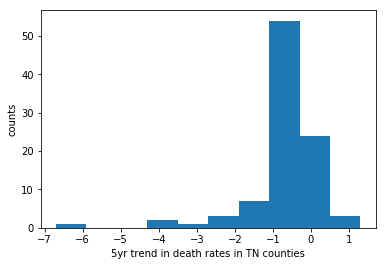

In [67]:
# * What does the distribution of the `recent_5year_trend` of deaths from cancer look like for TN counties?
import matplotlib.pyplot as plt
%matplotlib inline
#investigate the mean and median
dr_5yr_mean = pop_and_cancer['Recent 5-Year Trend in Death Rates'].mean()
dr_5yr_median = pop_and_cancer['Recent 5-Year Trend in Death Rates'].median()
print('Recent 5-Year Trend in Death Rates (mean , median) for all counties: ', 
     dr_5yr_mean, dr_5yr_median)
print('mean < median: right skewed distribution')
dr_5yr = pop_and_cancer['Recent 5-Year Trend in Death Rates']
plt.hist(dr_5yr)
plt.xlabel('5yr trend in death rates in TN counties')
plt.ylabel('counts',rotation = 90)
print('death rates are decreasing in general, some counties are seeing much higher decrease than others')
pop_and_cancer['County'].iloc[dr_5yr[dr_5yr < -3].index]
pop_and_cancer[['County','Recent 5-Year Trend in Death Rates']].iloc[dr_5yr[dr_5yr < -3].index]

In [ ]:
* What does the distribution of counties **meeting** and **not meeting** the 2020 Healthy People Objective 
target of 161.4 cancer deaths per 100,000 people look like?

 majority of counties did not  met the criteria


,County,Recent 5-Year Trend in Death Rates
23,Fayette,-1.4
63,Moore,-2.1
68,Pickett,-0.5
82,Sumner,-2.2
87,Van Buren,-0.9
93,Williamson,-3.8


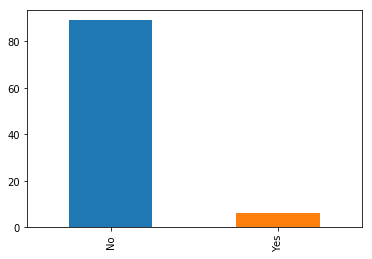

In [70]:
#  is binary variable
met_criteria = pop_and_cancer['Met Healthy People Objective of 161.4?']
met_criteria
met_criteria.value_counts().plot(kind='bar')
print(' majority of counties did not  met the criteria')
pop_and_cancer[['County','Recent 5-Year Trend in Death Rates']].iloc[met_criteria[met_criteria == 'Yes'].index]

In [87]:
# * Find the 4 counties that have more than 2 hospice facilities? Any surprises?
pop_and_cancer[pop_and_cancer.hospice_per_county > 2].index

Int64Index([18, 32, 46, 78], dtype='int64')

In [ ]:
* Find the 4 counties that have more than 2 hospice facilities? Any surprises

In [89]:
pop_and_cancer[['County', 'hospice_per_county']].iloc[pop_and_cancer[pop_and_cancer.hospice_per_county > 2].index]

,County,hospice_per_county
18,Davidson,8
32,Hamilton,5
46,Knox,5
78,Shelby,5


In [35]:
# play area
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df
for i in df.columns:
    print(i)
    print(type(i))
    if(i not in ['a','B']):
       df.drop(inplace=True,columns = i )
df

A
<class 'str'>
B
<class 'str'>


,B
0,4
1,5
2,6


In [ ]:
# strategy1: rename the columns that need to be kep to the column name specified and
# then drop every column that is not present in the list
pop_df = pd.read_csv(r'..\data\PEP_2017_PEPAGESEX.csv', skiprows = 1)
#    'Population Estimate (as of July 1) - 2010 - Both Sexes; Total - 65 to 69 years':'pop2010_65to69',


# strategy 2: drop columns in chuncks that you don't need 
# rename the remaining
# issue cross checking the work 
# too many column names

pop_df_col = pd.read_csv(r'..\data\PEP_2017_PEPAGESEX.csv', nrows = 1)
pop_df_col.values.shape
# row and column names are index objects can be casetd to list
pop_df_col2 = list(pop_df.columns)
pop_df_col2
#?pop_df.drop

In [ ]:
# test
pop_df_col_orig = pop_df_col.copy()
# rename all columns to delete
pop_df_col.columns = ['delete' for i in pop_df_col.columns ]
pop_df_col

In [ ]:
# create a mapper for name
dict('a':'1','b':'2','c':'3')

In [ ]:
?pop_df_col.rename